## **Import Module**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## **Preprocess Data**

In [40]:
#Open dataset
data_1 = pd.read_excel('online_retail_II.xlsx', 'Year 2009-2010')
data_2 = pd.read_excel('online_retail_II.xlsx', 'Year 2010-2011')

data = pd.concat([data_1,data_2])
data.shape

(1067371, 8)

In [41]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [43]:
using_column=['InvoiceDate','Description','Quantity']
input_data=data[using_column]
input_data.head()

,InvoiceDate,Description,Quantity
0,2009-12-01 07:45:00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12
1,2009-12-01 07:45:00,PINK CHERRY LIGHTS,12
2,2009-12-01 07:45:00,WHITE CHERRY LIGHTS,12
3,2009-12-01 07:45:00,"RECORD FRAME 7"" SINGLE SIZE",48
4,2009-12-01 07:45:00,STRAWBERRY CERAMIC TRINKET BOX,24


In [44]:
#Checking for missinge values
input_data.isnull().sum()

InvoiceDate       0
Description    4382
Quantity          0
dtype: int64

Note 1: Terdapat 2928 data yang tidak memiliki deskripsi.
Buang data yang tidak memiliki deskripsi.

In [45]:
#Remove missing value
input_data=input_data.dropna()
input_data.shape

(1062989, 3)

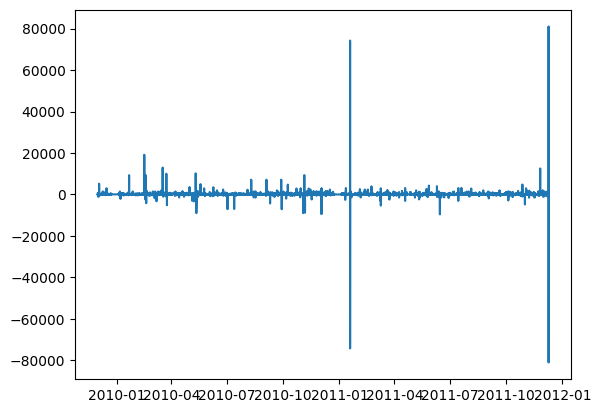

In [46]:
#Checking for unrealistic values
plt.plot(input_data['InvoiceDate'],input_data['Quantity'])

Note 2: Terdapat data yang memiliki Quantity negatif. Buang data dengan Quantity negatif.

In [47]:
#Remove unrealistic data
input_data=input_data.drop(input_data[input_data['Quantity'] < 0].index)
input_data=input_data.drop(input_data[input_data['Quantity'] > 1000].index)

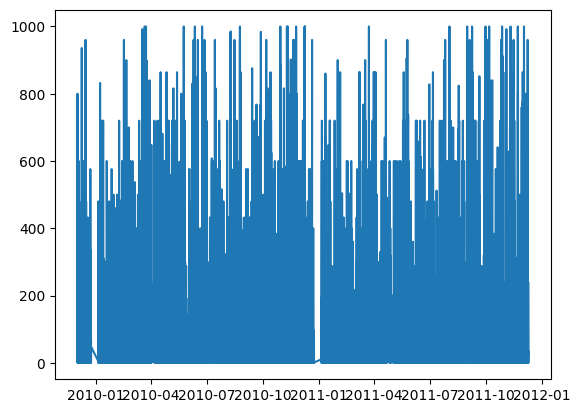

In [48]:
plt.plot(input_data['InvoiceDate'],input_data['Quantity'])

In [49]:
#Check amount of each product
kind_of_product = data['Description'].value_counts()
kind_of_product

Description
WHITE HANGING HEART T-LIGHT HOLDER     5918
REGENCY CAKESTAND 3 TIER               4412
JUMBO BAG RED RETROSPOT                3469
ASSORTED COLOUR BIRD ORNAMENT          2958
PARTY BUNTING                          2765
                                       ... 
IVORY PENDANT SHELL NECKLACE              1
allocate stock for dotcom orders ta       1
PAINTED HEART WREATH WITH BELL            1
FLOWER FAIRY MUG+COASTER,ROSE             1
Zebra invcing error                       1
Name: count, Length: 5698, dtype: int64

In [50]:
products = ['WHITE HANGING HEART T-LIGHT HOLDER',
            'REGENCY CAKESTAND 3 TIER',
            'JUMBO BAG RED RETROSPOT',
            'ASSORTED COLOUR BIRD ORNAMENT',
            'PARTY BUNTING']

product_data = {}  # Membuat kamus kosong untuk menyimpan data

for i, product in enumerate(products):
    product_data[i+1] = input_data[input_data['Description'] == product][['InvoiceDate', 'Quantity']]

In [51]:
product_data[1]

,InvoiceDate,Quantity
102,2009-12-01 09:46:00,6
147,2009-12-01 10:06:00,32
271,2009-12-01 10:52:00,64
366,2009-12-01 11:34:00,1
403,2009-12-01 11:37:00,32
...,...,...
537291,2011-12-08 10:59:00,1
537326,2011-12-08 11:15:00,2
537852,2011-12-08 12:28:00,6
539979,2011-12-08 18:03:00,32


In [52]:
for i in range (1,6):
    product_data[i].set_index('InvoiceDate', inplace=True)
    #Grouped data for each day
    product_data[i] = product_data[i].resample('D').sum()
    product_data[i] = product_data[i].drop(product_data[i][product_data[i]['Quantity'] > 1000].index)

In [53]:
product_data[1]

,Quantity
InvoiceDate,
2009-12-01,261
2009-12-02,742
2009-12-03,359
2009-12-04,179
2009-12-05,96
...,...
2011-12-04,7
2011-12-05,313
2011-12-06,39


In [54]:
#DATA UNTUK DIGUNAKAN
series = {}
array = {}
time = {}

for i in range (1,6):
    series[i] = np.array(product_data[i]['Quantity'].values.tolist())
    array[i] = list(range(0, len(series[i])))
    time[i] = np.array(array[i])

In [55]:
new_data = []
for index,data in enumerate(series[1]):
  new_data.append([index+1,data])

In [56]:
new_df = pd.DataFrame(new_data, columns = ['No', 'Max'])
new_df.head()

,No,Max
0,1,261
1,2,742
2,3,359
3,4,179
4,5,96


In [57]:
def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Data")
  plt.grid(True) 

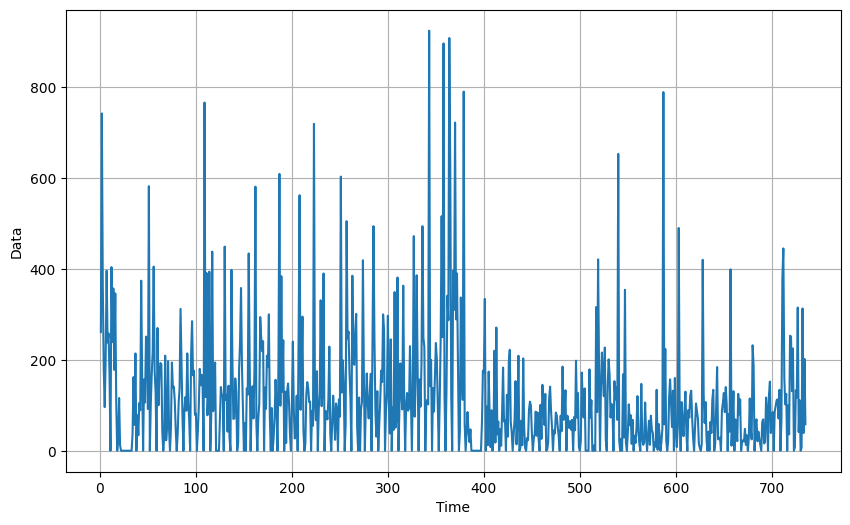

In [58]:
time = np.array(new_df['No'].values.tolist())
series = np.array(new_df['Max'].values.tolist())

plt.figure(figsize=(10, 6))
plot_series(time, series)

In [21]:
#NORMALISASI

#min_value = data_white_hanging['Quantity'].min()
#max_value = data_white_hanging['Quantity'].max()
#data_white_hanging['normalized'] = (data_white_hanging['Quantity'] - min_value) / (max_value - min_value)
#series = np.array(data_white_hanging['normalized'].values.tolist())
#array = list(range(0, len(series)))
#time = np.array(array)

## **Split Data**

In [59]:
#Pisahkan Data Training dan Data Testing
split_time = int(0.9 * len(series)) #90%
x_train = series[:split_time]
time_train = time[:split_time]
x_valid = series[split_time:]
time_valid = time[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [60]:
print(time_train.shape)
print(x_train.shape)
print(time_valid.shape)
print(x_valid.shape)

(661,)
(661,)
(74,)
(74,)


## **Prepare Features and Labels (Windowing)**

In [61]:
#Windowing
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [62]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


## **Build and Compile Model**

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["mae"])
history = model.fit(dataset,epochs=1200)

Epoch 1/1200
20/20 [==============================] - 6s 26ms/step - loss: 115.7705 - mae: 116.2687
Epoch 2/1200
20/20 [==============================] - 1s 24ms/step - loss: 109.0372 - mae: 109.5355
Epoch 3/1200
20/20 [==============================] - 1s 24ms/step - loss: 102.4855 - mae: 102.9851
Epoch 4/1200
20/20 [==============================] - 1s 25ms/step - loss: 96.6540 - mae: 97.1530
Epoch 5/1200
20/20 [==============================] - 1s 25ms/step - loss: 92.4918 - mae: 92.9908
Epoch 6/1200
20/20 [==============================] - 1s 26ms/step - loss: 89.7131 - mae: 90.2115
Epoch 7/1200
20/20 [==============================] - 1s 27ms/step - loss: 88.5725 - mae: 89.0706
Epoch 8/1200
20/20 [==============================] - 1s 32ms/step - loss: 87.8618 - mae: 88.3596
Epoch 9/1200
20/20 [==============================] - 0s 22ms/step - loss: 87.2789 - mae: 87.7768
Epoch 10/1200
20/20 [==============================] - 1s 27ms/step - loss: 86.6399 - mae: 87.1390
Epoch 11/1200

(1e-08, 10.0, 0.0, 150.0)

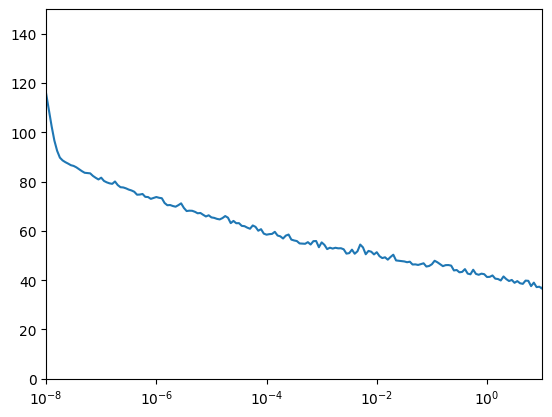

In [68]:
lrs = 1e-8 * (10 ** (np.arange(1200) / 20))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 10, 0, 150])

<Axes: >

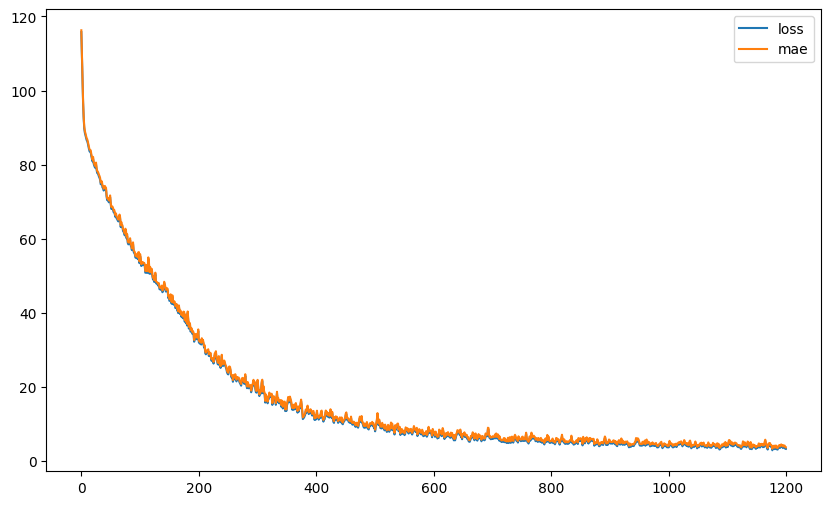

In [69]:
pd.DataFrame(history.history).plot(figsize=(10,6))

1/1 [==============================] - 0s 23ms/step


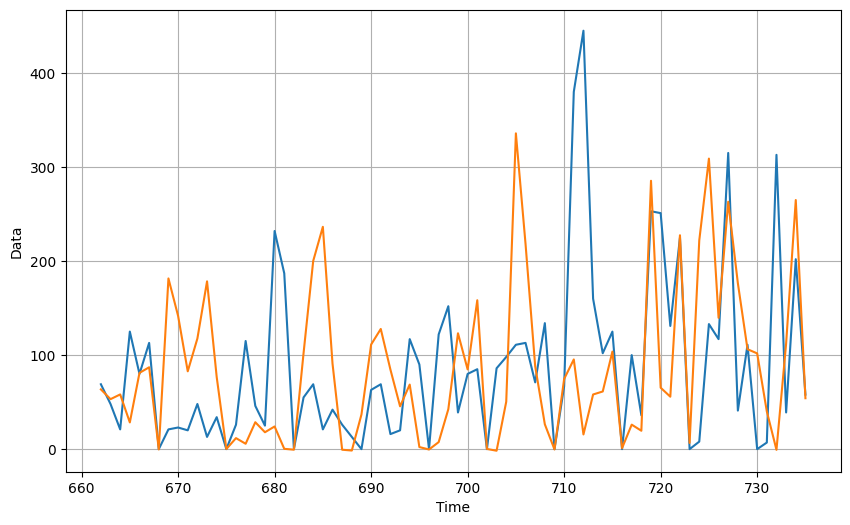

In [70]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [71]:
model.save('model_script_w30.h5')